<a href="https://colab.research.google.com/github/Vayansh/Face-Detection-using-openCV/blob/main/Face_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import os
os.listdir()

['.config', 'dataset.zip', 'sample_data']

In [12]:
!unzip /content/drive/MyDrive/dataset.zip


Archive:  /content/drive/MyDrive/dataset.zip
   creating: dataset/
  inflating: dataset/Mohit_Bansal.1.jpg  
  inflating: dataset/Mohit_Bansal.10.jpg  
  inflating: dataset/Mohit_Bansal.11.jpg  
  inflating: dataset/Mohit_Bansal.12.jpg  
  inflating: dataset/Mohit_Bansal.13.jpg  
  inflating: dataset/Mohit_Bansal.2.jpg  
  inflating: dataset/Mohit_Bansal.3.jpg  
  inflating: dataset/Mohit_Bansal.4.jpg  
  inflating: dataset/Mohit_Bansal.5.jpg  
  inflating: dataset/Mohit_Bansal.6.jpg  
  inflating: dataset/Mohit_Bansal.7.jpg  
  inflating: dataset/Mohit_Bansal.8.jpg  
  inflating: dataset/Mohit_Bansal.9.jpg  
  inflating: dataset/Mohit_Bansal._0_1011.png  
  inflating: dataset/Mohit_Bansal._0_1028.png  
  inflating: dataset/Mohit_Bansal._0_1043.png  
  inflating: dataset/Mohit_Bansal._0_1070.png  
  inflating: dataset/Mohit_Bansal._0_1137.png  
  inflating: dataset/Mohit_Bansal._0_1183.png  
  inflating: dataset/Mohit_Bansal._0_1195.png  
  inflating: dataset/Mohit_Bansal._0_1243.png  

In [11]:
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,ZeroPadding2D
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import Callback



In [3]:
foldername ='dataset/'
filename = os.listdir(foldername)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


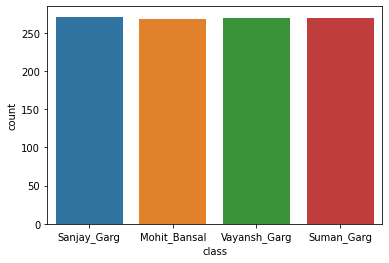

In [5]:
# consts 
Batch = 15
img_height , img_width, ch = 256,256,3
img_shape = (img_width,img_height)

# Dataframe Building
category = []
for i in filename:
    cate = i.split('.')[0]
    category.append(cate)    

df = pd.DataFrame({
    'filename': filename,
    'class':category
})
            
sns.countplot(df['class'],data=df)
# plt.waitforbuttonpress()            
 




In [6]:

#   Model  
model = Sequential() 
model.add(ZeroPadding2D((1,1),input_shape = (img_width,img_height,ch)))
model.add(Conv2D(32,(3,3),activation='relu'))    # Ist Conv layer or Input layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))    # Ist Conv layer or Input layer
model.add(MaxPool2D(pool_size=(2,2)))


model.add(ZeroPadding2D((2,2)))
model.add(Conv2D(64,(5,5),activation='relu'))    # Ist Conv layer or Input layer
model.add(Conv2D(64,(5,5),activation='relu'))    # Ist Conv layer or Input layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128,(3,3),activation='relu'))                                        # 2nd Conv layer
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 
model.add(Conv2D(128,(3,3),activation='relu'))                                        # 2nd Conv layer
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(0.3))

model.add(Conv2D(16,(3,3),activation='relu'))
# model.add(Conv2D(16,(3,3),activation='relu'))                                        # 2nd Conv layer                                        # 2nd Conv layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(256,(3,3),activation='relu'))                                          #3rd Conv layer
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(256,(3,3),activation='relu'))                                          #3rd Conv layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 
model.add(Flatten())
# model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))          # 4th layer and Ist Dense layer
# model.add(Dropout(0.5))

model.add(Dense(units=4,activation='softmax'))                                          #6th layer and 3rd Dense layer or output layer
model.compile(optimizer= Adam(learning_rate=0.0002),loss= CategoricalCrossentropy(),metrics= [CategoricalAccuracy()])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 258, 258, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                        

In [7]:


# Spliting dataset into train and test
train_df,test_df = train_test_split(df,test_size=0.2,random_state=8)
trian_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

# Train Image Generator
train_datagen = ImageDataGenerator(rescale= 1./255)
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    './dataset/',
    x_col= 'filename',
    y_col= 'class',
    target_size= img_shape,
    color_mode= 'rgb',
    class_mode= 'categorical',
    batch_size= Batch
)

# Test Image Generator
test_datagen = ImageDataGenerator(rescale= 1./255)
test_gen = test_datagen.flow_from_dataframe(
    test_df,
    './dataset/',
    x_col= 'filename',
    y_col= 'class',
    target_size= img_shape,
    color_mode= 'rgb',
    class_mode= 'categorical',
    batch_size= Batch
)



Found 862 validated image filenames belonging to 4 classes.
Found 216 validated image filenames belonging to 4 classes.


In [15]:
class myCallback(Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('categorical_accuracy') > 0.95):
                print("\nReached 95% accuracy so cancelling training!")
                self.model.stop_training = True
    
callbacks = myCallback()

In [16]:

# checkpoint = ModelCheckpoint('Face_detection_30_eopchs_checkpoint.hdf5',moniter= 'val_loss', mode ='min')

history = model.fit(train_gen,epochs= 30 , validation_data= test_gen , validation_steps= 216//Batch , steps_per_epoch= 862//Batch , callbacks= [callbacks])
model.save("Face_detection_30_epochs.h5")


Epoch 1/30
57/57 [==============================] - 25s 438ms/step - loss: 1.3125 - categorical_accuracy: 0.3766 - val_loss: 0.9774 - val_categorical_accuracy: 0.5190
Epoch 2/30
57/57 [==============================] - 25s 430ms/step - loss: 0.9588 - categorical_accuracy: 0.5230 - val_loss: 0.8500 - val_categorical_accuracy: 0.6000
Epoch 3/30
57/57 [==============================] - 24s 430ms/step - loss: 0.8637 - categorical_accuracy: 0.5773 - val_loss: 0.7969 - val_categorical_accuracy: 0.6381
Epoch 4/30
57/57 [==============================] - 26s 454ms/step - loss: 0.7737 - categorical_accuracy: 0.6246 - val_loss: 0.7162 - val_categorical_accuracy: 0.6429
Epoch 5/30
57/57 [==============================] - 25s 431ms/step - loss: 0.7898 - categorical_accuracy: 0.6281 - val_loss: 0.7126 - val_categorical_accuracy: 0.6476
Epoch 6/30
57/57 [==============================] - 24s 432ms/step - loss: 0.7251 - categorical_accuracy: 0.6860 - val_loss: 0.6420 - val_categorical_accuracy: 0.781